### MovieLens Case Study

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- **ratings.csv:** It contains information on ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- **movie.csv:** File contains information related to the movies and its genre. Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- **user.csv:** It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To extract insights from the dataset`

### Learning Outcomes:
`Use of Pandas Functions - shape, describe, groupby, merge etc.`


#### Domain 
`Internet and Entertainment`

**Note that the case study will need you to apply the concepts of groupby and merging extensively.**

### 1. Import the necessary packages

In [1]:
import pandas as pd
import numpy as np


### 2. Read all the three datasets

In [33]:
df = pd.read_csv('ratings.csv')
df1 = pd.read_csv('movie.csv')
df2 = pd.read_csv('user.csv')

### 3. View the first 5 rows of all the datasets.
`Note that you will need to do it for all the three datasets seperately`

In [32]:
df.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
df1.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1-Jan-95,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,1-Jan-95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1-Jan-95,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1-Jan-95,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
df2.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### 4. Understand the shape of all the datasets.
`Note that you will need to do it for all the three datasets seperately`

In [8]:
df.shape

(100000, 4)

In [9]:
df1.shape

(1680, 21)

In [10]:
df2.shape

(943, 5)

### 5. Check the data types of the columns for all the datasets.
 `Note that you will need to do it for all the three datasets seperately`

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1680 non-null   int64 
 1   movie title   1680 non-null   object
 2   release date  1680 non-null   object
 3   Action        1680 non-null   int64 
 4   Adventure     1680 non-null   int64 
 5   Animation     1680 non-null   int64 
 6   Childrens     1680 non-null   int64 
 7   Comedy        1680 non-null   int64 
 8   Crime         1680 non-null   int64 
 9   Documentary   1680 non-null   int64 
 10  Drama         1680 non-null   int64 
 11  Fantasy       1680 non-null   int64 
 12  Film-Noir     1680 non-null   int64 
 13  Horror        1680 non-null   int64 
 14  Musical       1680 non-null   int64 
 15  Mystery       1680 non-null   int64 
 16  Romance       1680 non-null   int64 
 17  Sci-Fi        1680 non-null   int64 
 18  Thriller      1680 non-null   int64 
 19  War   

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


### 6. Give a statistical summary for all the datasets.
`Note that you will need to do it for all the three datasets seperately`

In [14]:
df.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [15]:
df1.describe(include='all')

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1680.000000,1680,1680,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000
unique,NaN,1657,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,That Darn Cat!,1-Jan-95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,841.525595,NaN,NaN,0.149405,0.080357,0.025000,0.072619,0.300595,0.064881,0.029762,...,0.013095,0.014286,0.054762,0.033333,0.036310,0.147024,0.060119,0.149405,0.042262,0.016071
std,485.609591,NaN,NaN,0.356593,0.271926,0.156171,0.259587,0.458653,0.246389,0.169980,...,0.113717,0.118701,0.227583,0.179559,0.187115,0.354235,0.237778,0.356593,0.201246,0.125788
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.750000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.250000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
df2.describe(include='all')

,user id,age,gender,occupation,zip code
count,943.000000,943.000000,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.000000,34.051962,NaN,NaN,NaN
std,272.364951,12.192740,NaN,NaN,NaN
min,1.000000,7.000000,NaN,NaN,NaN
25%,236.500000,25.000000,NaN,NaN,NaN
50%,472.000000,31.000000,NaN,NaN,NaN
75%,707.500000,43.000000,NaN,NaN,NaN


### 7. Find the number of movies per genre using the movie data

In [17]:
genre_counts = df1.iloc[:, 3:].sum()
genre_counts

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

### 8. Find the movies that have more than one genre


In [18]:
df1['genre_count'] = df1.iloc[:, 3:].sum(axis=1)

In [19]:
movies_with_multiple_genres = df1[df1['genre_count'] > 1]

In [20]:
print(movies_with_multiple_genres[['movie title', 'genre_count']])

             movie title  genre_count
0             Toy Story             3
1             GoldenEye             3
3            Get Shorty             3
4               Copycat             3
6        Twelve Monkeys             2
...                  ...          ...
1666  MURDER and murder             3
1667            Tainted             2
1670             Mirage             2
1676          B. Monkey             2
1677      Sliding Doors             2

[849 rows x 2 columns]


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100



In [21]:
average_ratings = df.groupby('movie id')['rating'].agg(['mean', 'count'])

In [22]:
average_ratings = average_ratings[average_ratings['count'] > 100]

In [23]:
average_ratings.sort_values(by='mean', ascending=False, inplace=True)

In [24]:
top_25_movies = average_ratings.head(25)

In [25]:
top_25_movies

,mean,count
movie id,,
408,4.491071,112
318,4.466443,298
169,4.466102,118
483,4.456790,243
64,4.445230,283
603,4.387560,209
12,4.385768,267
50,4.358491,583
178,4.344000,125


### 10. See gender distribution across different genres check for the validity of the below statements

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

In [26]:
gender = df2['gender']

In [27]:
df1.groupby(gender)[['Romance', 'Sci-Fi','Drama']].mean()*100

,Romance,Sci-Fi,Drama
gender,,,
F,19.047619,10.256410,38.461538
M,15.522388,8.507463,38.805970


### 11. Create age brackets in interval of 10 years and display the distribution of ratings for each bracket.


In [34]:
# First, merge the ratings (df) with movie data (df1) on 'movie id'
merged_df = pd.merge(df, df1, on='movie id')

# Then, merge the result with user data (df2) on 'user id'
merged_df = pd.merge(merged_df, df2, on='user id')

# Check the merged DataFrame
merged_df.head()


,user id,movie id,rating,timestamp,movie title,release date,Action,Adventure,Animation,Childrens,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip code
0,196,242,3,881250949,Kolya,24-Jan-97,0,0,0,0,...,0,0,0,0,0,0,49,M,writer,55105
1,196,257,2,881251577,Men in Black,4-Jul-97,1,1,0,0,...,0,0,1,0,0,0,49,M,writer,55105
2,196,111,4,881251793,"Truth About Cats & Dogs, The",26-Apr-96,0,0,0,0,...,0,1,0,0,0,0,49,M,writer,55105
3,196,25,4,881251955,"Birdcage, The",8-Mar-96,0,0,0,0,...,0,0,0,0,0,0,49,M,writer,55105
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",1-Jan-94,0,0,0,0,...,0,0,0,0,0,0,49,M,writer,55105


In [35]:
# Create age brackets in bins of 10 years
age_brackets = pd.cut(merged_df['age'], bins=range(0, 101, 10), right=False, labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])
merged_df['age_bracket'] = age_brackets

# Check the DataFrame with the age brackets
merged_df[['age', 'age_bracket']].head()


,age,age_bracket
0,49,40-49
1,49,40-49
2,49,40-49
3,49,40-49
4,49,40-49


### 12. Which Occupation on the customers mostly watch Drama and Animation movies? Which age group has the most ratings for these genres?


In [36]:
# Filter for movies that are either Drama or Animation
drama_animation_df = merged_df[(merged_df['Drama'] == 1) | (merged_df['Animation'] == 1)]

# Check the filtered DataFrame
drama_animation_df.head()


,user id,movie id,rating,timestamp,movie title,release date,Action,Adventure,Animation,Childrens,...,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip code,age_bracket
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",1-Jan-94,0,0,0,0,...,0,0,0,0,0,49,M,writer,55105,40-49
7,196,286,5,881250949,"English Patient, The",15-Nov-96,0,0,0,0,...,1,0,0,1,0,49,M,writer,55105,40-49
13,196,762,3,881251955,Beautiful Girls,9-Feb-96,0,0,0,0,...,0,0,0,0,0,49,M,writer,55105,40-49
15,196,306,4,881251021,"Mrs. Brown (Her Majesty, Mrs. Brown)",1-Jan-97,0,0,0,0,...,1,0,0,0,0,49,M,writer,55105,40-49
16,196,8,5,881251753,Babe,1-Jan-95,0,0,0,1,...,0,0,0,0,0,49,M,writer,55105,40-49


In [37]:
# Group by occupation and count the number of ratings
occupation_drama_animation = drama_animation_df.groupby('occupation').size().sort_values(ascending=False)

# Output occupations with the most ratings for Drama & Animation movies
print("Occupations with the most ratings for Drama & Animation movies:")
print(occupation_drama_animation)


Occupations with the most ratings for Drama & Animation movies:
occupation
student          8691
other            4728
educator         4544
engineer         3516
administrator    3302
programmer       3112
librarian        2716
writer           2384
executive        1498
technician       1427
healthcare       1386
artist           1078
scientist         993
marketing         903
entertainment     866
retired           762
lawyer            578
salesman          332
none              311
doctor            260
homemaker         113
dtype: int64


In [38]:
# Group by age bracket and count the number of ratings
age_bracket_drama_animation = drama_animation_df.groupby('age_bracket').size().sort_values(ascending=False)

# Output age groups with the most ratings for Drama & Animation movies
print("\nAge groups with the most ratings for Drama & Animation movies:")
print(age_bracket_drama_animation)



Age groups with the most ratings for Drama & Animation movies:
age_bracket
20-29    16396
30-39    11214
40-49     6940
50-59     4343
10-19     3168
60-69     1334
70-79       92
0-9         13
80-89        0
90-99        0
dtype: int64


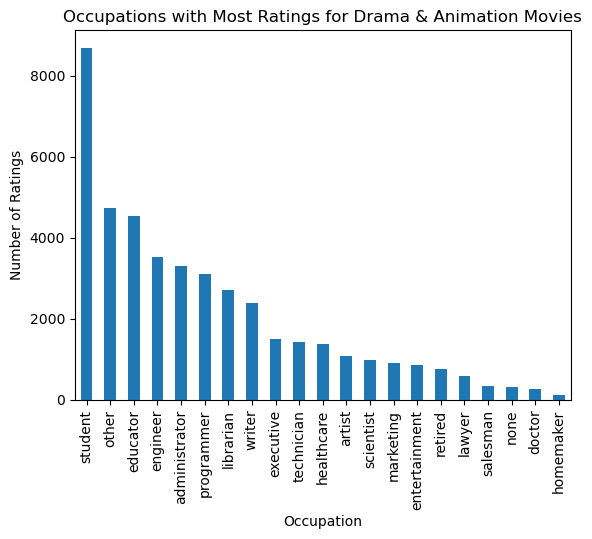

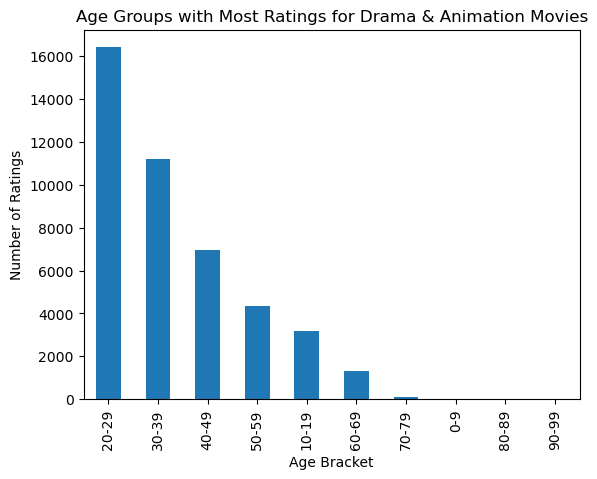

In [39]:
import matplotlib.pyplot as plt

# Plot for occupations
occupation_drama_animation.plot(kind='bar', title="Occupations with Most Ratings for Drama & Animation Movies")
plt.xlabel('Occupation')
plt.ylabel('Number of Ratings')
plt.show()

# Plot for age groups
age_bracket_drama_animation.plot(kind='bar', title="Age Groups with Most Ratings for Drama & Animation Movies")
plt.xlabel('Age Bracket')
plt.ylabel('Number of Ratings')
plt.show()
